# Download the data from Kaggle

In [6]:
# !pip install -q kaggle

# !mkdir ./.kaggle data
# !mv kaggle.json ./.kaggle

# !kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

# !unzip -q brain-tumor-classification-mri.zip -d data
# !rm brain-tumor-classification-mri.zip

In [1]:
!pwd

/home/sagemaker-user/Brain-Tumor-Classification-MRI/notebooks


In [2]:
%cd ../

/home/sagemaker-user/Brain-Tumor-Classification-MRI


In [3]:
from dataclasses import dataclass
from pathlib import Path

In [4]:
@dataclass
class DataConfig:
    dataset_name: str
    data_folder_name: str
    artifacts_root: str

In [5]:
from src.constants import *
from src.utils import read_yaml, create_dirs

In [6]:
class ConfigManager:
    def __init__(self, config_path=CONFIG_PATH, params_path=PARAMS_PATH):
        self.config = read_yaml(CONFIG_PATH)
        self.params = read_yaml(PARAMS_PATH)

        create_dirs([self.config.artifacts_root])

    def get_data_config(self):
        data_config = self.config.data_ingestion
        return DataConfig(
            dataset_name=data_config.dataset_name,
            data_folder_name=data_config.data_folder_name,
            artifacts_root=self.config.artifacts_root
        )

In [7]:
import os
from src import logger
import kaggle
from src.utils import get_size

In [8]:
kaggle.api.authenticate()

In [9]:
class DataIngestion:
    def __init__(self, data_config: DataConfig):
        self.data_config = data_config

    def download(self):

        new_folder_name = self.data_config.data_folder_name
        artifacts_root = self.data_config.artifacts_root
        data_path = f'{artifacts_root}/{new_folder_name}'

        if not os.path.exists(Path(data_path)):
            kaggle.api.dataset_download_files(
                self.data_config.dataset_name,
                path=Path(data_path), unzip=True
            )

            logger.info(
                f'Data was downloaded successfully and saved at "{data_path}", with size {get_size(data_path)}'
            )
        else:
            logger.info(
                f'Data already exists and saved at "{data_path}", with size {get_size(data_path)}'
            )

In [10]:
try:
    config = ConfigManager()
    data_config = config.get_data_config()
    data_ingestion = DataIngestion(data_config=data_config)
    data_ingestion.download()
except Exception as e:
    raise e

[2024-09-24 09:33:18,689: INFO: utils: The file: config/config.yaml loaded successfully...]
[2024-09-24 09:33:18,690: INFO: utils: The file: params.yaml loaded successfully...]
[2024-09-24 09:33:18,691: INFO: utils: Directory 'artifatcts' was successfully created...]
[2024-09-24 09:33:18,705: INFO: 2895145122: Data already exists and saved at "artifatcts/data", with size ~ 88.77 MB]


# Data Exploration

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [6]:
training_parent_dir = r"data/Training"
testing_parent_dir = r"data/Training"

os.listdir(training_parent_dir)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [5]:
for cls in os.listdir(training_parent_dir):
    class_path = os.path.join(training_parent_dir, cls)
    print(f'Class {cls} has', len(os.listdir(class_path)), 'images')

Class glioma_tumor has 826 images
Class meningioma_tumor has 822 images
Class no_tumor has 395 images
Class pituitary_tumor has 827 images


In [7]:
def imshow(path, title=None):
    arrim = np.array(Image.open(path))
    plt.imshow(arrim)
    if title: plt.title(title)
    plt.axis('off')

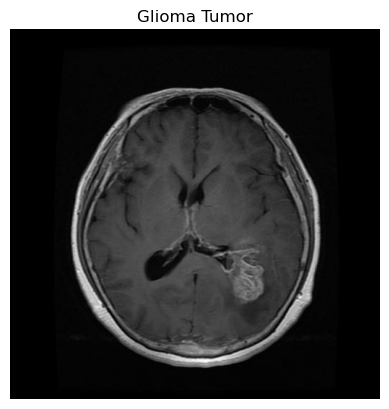

In [8]:
imshow(path = r"data/Training/glioma_tumor/gg (10).jpg", title = "Glioma Tumor")

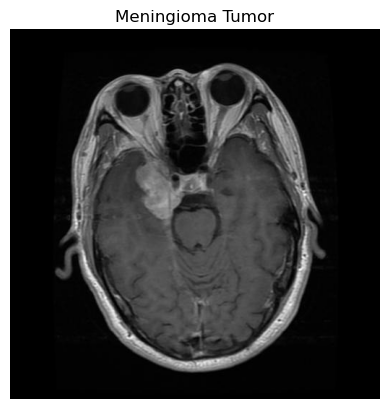

In [9]:
imshow(path = r"data/Training/meningioma_tumor/m (104).jpg", title = "Meningioma Tumor")

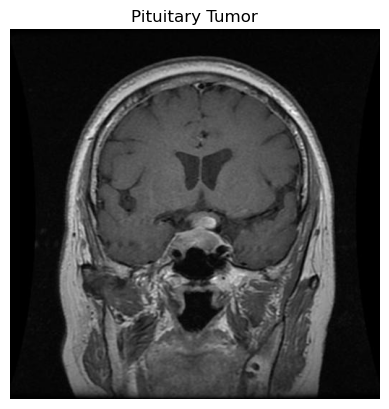

In [10]:
imshow(path = r"data/Training/pituitary_tumor/p (106).jpg", title = "Pituitary Tumor")

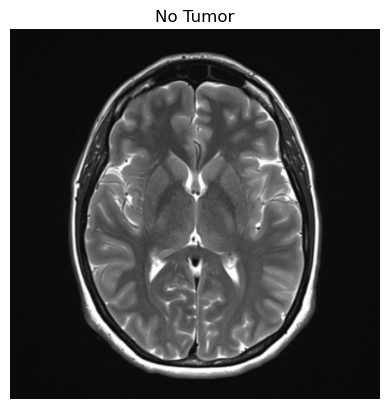

In [11]:
imshow(path = r"data/Training/no_tumor/image (19).jpg", title = "No Tumor")